In [72]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns
import datetime as dt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

#Preprocessing


In [ ]:
df = pd.read_csv("/content/NASA Near-Earth Objects.csv", parse_dates=[0], infer_datetime_format=True)
df

,Unnamed: 0,id,neo_reference_id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
0,0,2001981,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
1,1,2002059,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2,2,2002061,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
3,3,2002062,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
4,4,2002063,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,23995,54073361,54073361,(2020 UQ),NaN,2020 UQ,26.90,False,False,0.011080,0.024777,3,APO,0.608650,1.901363,2020-10-16,2020-10-19,Near-Earth asteroid orbits which cross the Ear...
23996,23996,54073362,54073362,(2020 UR),NaN,2020 UR,27.90,False,False,0.006991,0.015633,4,APO,0.732739,1.887929,2020-10-16,2020-10-19,Near-Earth asteroid orbits which cross the Ear...
23997,23997,54073363,54073363,(2020 US),NaN,2020 US,27.20,False,False,0.009651,0.021579,5,APO,0.788983,2.851299,2020-10-16,2020-10-21,Near-Earth asteroid orbits which cross the Ear...
23998,23998,54073365,54073365,(2020 UT),NaN,2020 UT,27.33,False,False,0.009090,0.020325,2,AMO,1.045124,4.170737,2020-10-15,2020-10-18,Near-Earth asteroid orbits similar to that of ...


In [ ]:
df1= df.drop(['Unnamed: 0','id', 'neo_reference_id', 'name', 'designation', 'orbit_id', 'orbit_class_description', 'name_limited'], axis=1)
df1

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date
0,15.22,True,False,2.401900,5.370812,APO,0.621512,2.931360,1973-03-06,2021-10-20
1,15.97,False,False,1.700415,3.802244,AMO,1.238537,4.047945,1963-10-16,2021-04-15
2,16.36,False,False,1.420872,3.177167,AMO,1.050403,3.478155,1960-10-22,2021-06-12
3,17.10,False,False,1.010543,2.259644,ATE,0.790185,1.143633,1955-12-17,2019-11-10
4,17.28,False,False,0.930154,2.079888,APO,0.701397,1.454804,1977-04-24,2021-12-02
...,...,...,...,...,...,...,...,...,...,...
23995,26.90,False,False,0.011080,0.024777,APO,0.608650,1.901363,2020-10-16,2020-10-19
23996,27.90,False,False,0.006991,0.015633,APO,0.732739,1.887929,2020-10-16,2020-10-19
23997,27.20,False,False,0.009651,0.021579,APO,0.788983,2.851299,2020-10-16,2020-10-21
23998,27.33,False,False,0.009090,0.020325,AMO,1.045124,4.170737,2020-10-15,2020-10-18


In [ ]:
df1.describe()

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance
count,23992.000000,23992.000000,23992.000000,24000.000000,24000.000000
mean,22.942274,0.167777,0.375160,0.915225,2.653104
std,2.952871,0.293000,0.655169,0.232201,4.468233
min,12.580000,0.000609,0.001362,0.070431,0.653754
25%,20.650000,0.024241,0.054205,0.785150,1.706281
50%,23.200000,0.060891,0.136157,0.965325,2.480109
75%,25.200000,0.197040,0.440595,1.068984,3.397965
max,33.200000,8.101305,18.115068,1.299988,631.895456


In [124]:
df2 = df1.dropna()
df2

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date
0,15.22,True,False,2.401900,5.370812,APO,0.621512,2.931360,06-03-1973,20-10-2021
1,15.97,False,False,1.700415,3.802244,AMO,1.238537,4.047945,16-10-1963,15-04-2021
2,16.36,False,False,1.420872,3.177167,AMO,1.050403,3.478155,22-10-1960,12-06-2021
3,17.10,False,False,1.010543,2.259644,ATE,0.790185,1.143633,17-12-1955,10-11-2019
4,17.28,False,False,0.930154,2.079888,APO,0.701397,1.454804,24-04-1977,02-12-2021
...,...,...,...,...,...,...,...,...,...,...
23995,26.90,False,False,0.011080,0.024777,APO,0.608650,1.901363,16-10-2020,19-10-2020
23996,27.90,False,False,0.006991,0.015633,APO,0.732739,1.887929,16-10-2020,19-10-2020
23997,27.20,False,False,0.009651,0.021579,APO,0.788983,2.851299,16-10-2020,21-10-2020
23998,27.33,False,False,0.009090,0.020325,AMO,1.045124,4.170737,15-10-2020,18-10-2020


In [133]:
df3 = df2.drop(['is_potentially_hazardous_asteroid', 'is_sentry_object','orbit_class_type'], axis=1)
df3

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date
0,15.22,2.401900,5.370812,0.621512,2.931360,06-03-1973,20-10-2021
1,15.97,1.700415,3.802244,1.238537,4.047945,16-10-1963,15-04-2021
2,16.36,1.420872,3.177167,1.050403,3.478155,22-10-1960,12-06-2021
3,17.10,1.010543,2.259644,0.790185,1.143633,17-12-1955,10-11-2019
4,17.28,0.930154,2.079888,0.701397,1.454804,24-04-1977,02-12-2021
...,...,...,...,...,...,...,...
23995,26.90,0.011080,0.024777,0.608650,1.901363,16-10-2020,19-10-2020
23996,27.90,0.006991,0.015633,0.732739,1.887929,16-10-2020,19-10-2020
23997,27.20,0.009651,0.021579,0.788983,2.851299,16-10-2020,21-10-2020
23998,27.33,0.009090,0.020325,1.045124,4.170737,15-10-2020,18-10-2020


In [134]:
df3.reset_index(drop=True, inplace=True)
df3

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date
0,15.22,2.401900,5.370812,0.621512,2.931360,06-03-1973,20-10-2021
1,15.97,1.700415,3.802244,1.238537,4.047945,16-10-1963,15-04-2021
2,16.36,1.420872,3.177167,1.050403,3.478155,22-10-1960,12-06-2021
3,17.10,1.010543,2.259644,0.790185,1.143633,17-12-1955,10-11-2019
4,17.28,0.930154,2.079888,0.701397,1.454804,24-04-1977,02-12-2021
...,...,...,...,...,...,...,...
23980,26.90,0.011080,0.024777,0.608650,1.901363,16-10-2020,19-10-2020
23981,27.90,0.006991,0.015633,0.732739,1.887929,16-10-2020,19-10-2020
23982,27.20,0.009651,0.021579,0.788983,2.851299,16-10-2020,21-10-2020
23983,27.33,0.009090,0.020325,1.045124,4.170737,15-10-2020,18-10-2020


In [136]:
df4 = df3
df4

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date
0,15.22,2.401900,5.370812,0.621512,2.931360,06-03-1973,20-10-2021
1,15.97,1.700415,3.802244,1.238537,4.047945,16-10-1963,15-04-2021
2,16.36,1.420872,3.177167,1.050403,3.478155,22-10-1960,12-06-2021
3,17.10,1.010543,2.259644,0.790185,1.143633,17-12-1955,10-11-2019
4,17.28,0.930154,2.079888,0.701397,1.454804,24-04-1977,02-12-2021
...,...,...,...,...,...,...,...
23980,26.90,0.011080,0.024777,0.608650,1.901363,16-10-2020,19-10-2020
23981,27.90,0.006991,0.015633,0.732739,1.887929,16-10-2020,19-10-2020
23982,27.20,0.009651,0.021579,0.788983,2.851299,16-10-2020,21-10-2020
23983,27.33,0.009090,0.020325,1.045124,4.170737,15-10-2020,18-10-2020


In [137]:
#df4['first_observation_date'] = pd.to_datetime(df4['first_observation_date'], format='%d-%m-%Y', errors='coerce')
#df4['first_observation_date'] = df4['first_observation_date'].map(dt.datetime.toordinal)
#df4['last_observation_date'] = pd.to_datetime(df4['last_observation_date'], format='%d-%m-%Y', errors='coerce')
#df4['last_observation_date'] = df4['last_observation_date'].map(dt.datetime.toordinal)
df4

,absolute_magnitude_h,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date
0,15.22,2.401900,5.370812,0.621512,2.931360,720323,738083
1,15.97,1.700415,3.802244,1.238537,4.047945,716894,737895
2,16.36,1.420872,3.177167,1.050403,3.478155,715805,737953
3,17.10,1.010543,2.259644,0.790185,1.143633,714034,737373
4,17.28,0.930154,2.079888,0.701397,1.454804,721833,738126
...,...,...,...,...,...,...,...
23980,26.90,0.011080,0.024777,0.608650,1.901363,737714,737717
23981,27.90,0.006991,0.015633,0.732739,1.887929,737714,737717
23982,27.20,0.009651,0.021579,0.788983,2.851299,737714,737719
23983,27.33,0.009090,0.020325,1.045124,4.170737,737713,737716


In [138]:
df4.dtypes

absolute_magnitude_h                 float64
kilometers_estimated_diameter_min    float64
kilometers_estimated_diameter_max    float64
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_date                 int64
last_observation_date                  int64
dtype: object

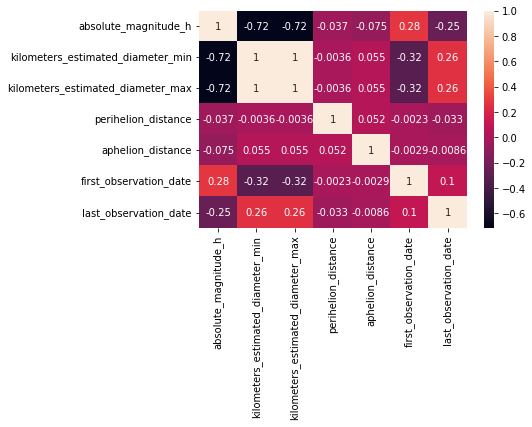

In [139]:
Var_Corr = df4.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

In [143]:
from sklearn.preprocessing import MinMaxScaler

X = df4.drop(['absolute_magnitude_h','kilometers_estimated_diameter_min'], axis=1)
y = df4['absolute_magnitude_h']

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X

,kilometers_estimated_diameter_max,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date
0,0.296430,0.448195,0.003608,0.976346,0.988361
1,0.209835,0.950022,0.005377,0.971699,0.976204
2,0.175326,0.797013,0.004474,0.970223,0.979955
3,0.124673,0.585377,0.000776,0.967822,0.942451
4,0.114749,0.513165,0.001269,0.978393,0.991141
...,...,...,...,...,...
23980,0.001293,0.437734,0.001976,0.999919,0.964694
23981,0.000788,0.538656,0.001955,0.999919,0.964694
23982,0.001116,0.584399,0.003481,0.999919,0.964824
23983,0.001047,0.792719,0.005572,0.999917,0.964630


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(17988, 5) (5997, 5)
(17988,) (5997,)


In [145]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.5256551809308965